In [ ]:
# 원본데이터의 개수 부족 -> 정확한 예측이 어려움
# 길이가 50cm(이상치, 극단값)인 농어에 대한 처리가 힘듬

In [1]:
import numpy as np

# 넘파이를 이용해서 배열을 생성함
# 농어 56개 데이터임
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # 1033.3g
print(knr.predict([[100]])) # 1033.3g

[1033.33333333]
[1033.33333333]


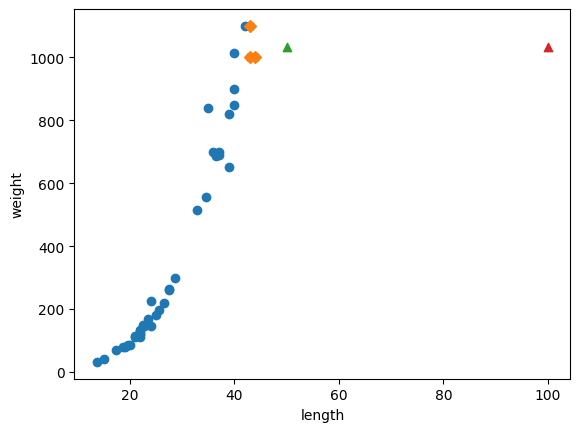

1033.3333333333333
[1033.33333333]


In [11]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 이웃 샘플들 마커표시

plt.scatter(50, 1033, marker='^')
plt.scatter(100, 1033, marker='^')
# 새 데이터들 마커표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(np.mean(train_target[indexes]))
print(knr.predict([[999999999]]))  # 전부 1033.3g
# 가진데이터의 최대길이를 넘는경우, 이웃들이 정해져있어서 항상 같은 예측값이 나옴

In [ ]:
# k최근접 이웃 알고리즘은 가볍고 사용하기 쉬운 대신 한계가 명확함 -> 대안: 선형회귀

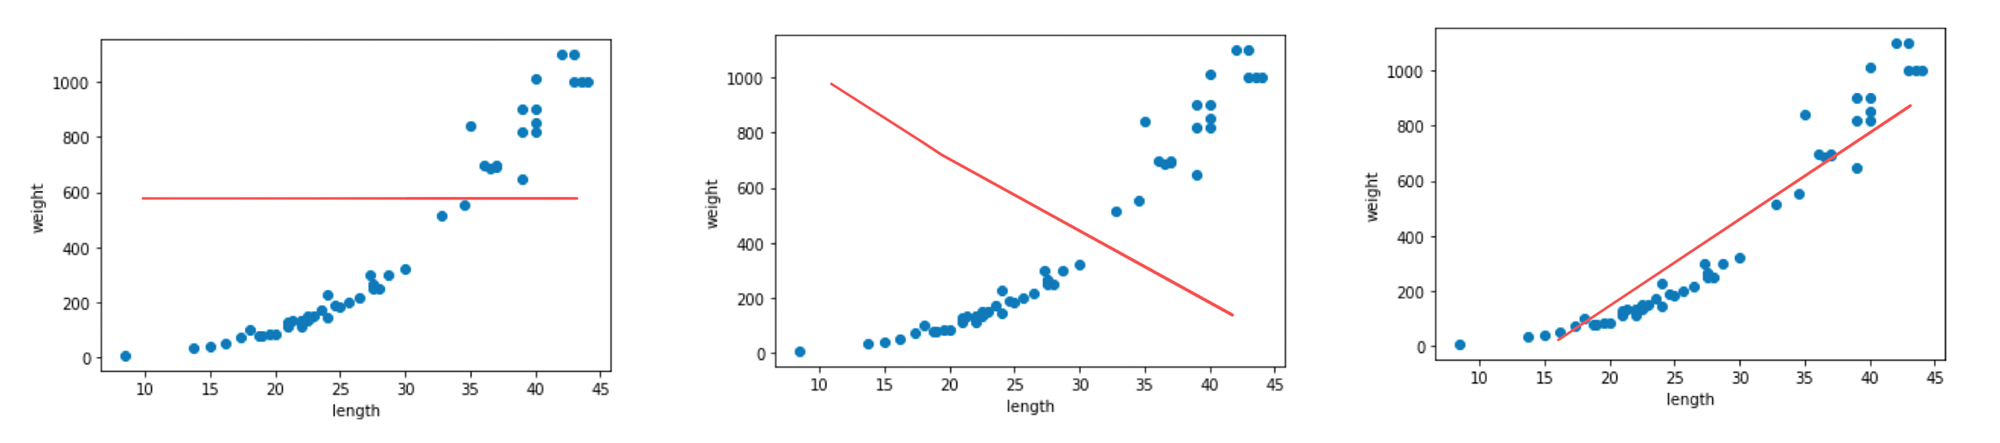

In [12]:
from sklearn.linear_model import LinearRegression # 선형회귀

lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [13]:
print(lr.predict([[50]])) # 1241.8g

[1241.83860323]


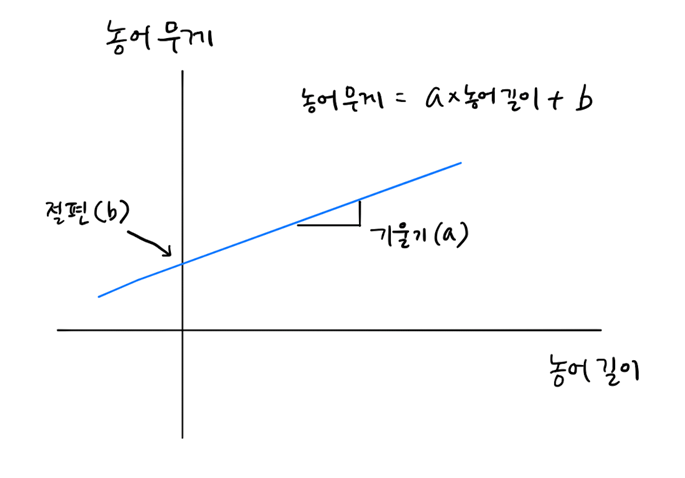

In [14]:
print(f"계수 (Coefficients): {lr.coef_}")
print(f"절편 (Intercept): {lr.intercept_}")

계수 (Coefficients): [39.01714496]
절편 (Intercept): -709.0186449535477


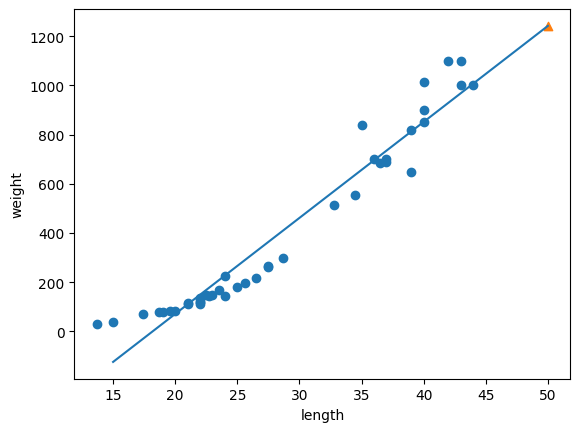

In [25]:
# 그래프로 확인 해보자.
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

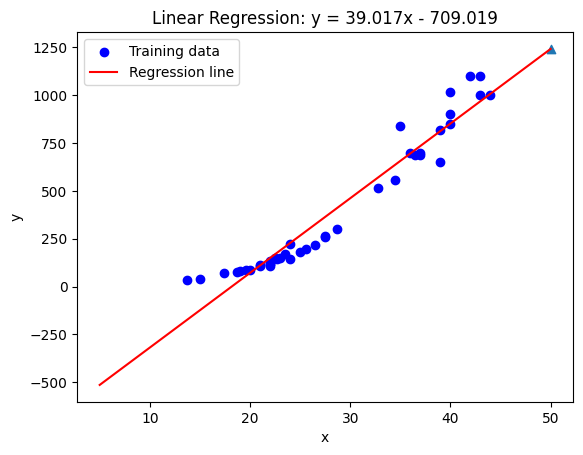

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 훈련 (train_input과 train_target은 이미 존재하는 데이터라고 가정)
lr = LinearRegression()
lr.fit(train_input, train_target)

# 예측값 생성
x_range = np.arange(5, 51).reshape(-1, 1)  # 예측을 위한 x 범위 (5에서 45까지)
y_pred = lr.predict(x_range)  # 예측된 y 값

# 훈련 데이터와 회귀선 그래프 그리기
plt.scatter(train_input, train_target, color='blue', label='Training data')  # 실제 훈련 데이터
plt.plot(x_range, y_pred, color='red', label='Regression line')  # 회귀선
plt.scatter(50, 1241.8, marker='^')
plt.title('Linear Regression: y = 39.017x - 709.019')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [27]:
# 직선으로만 예측하기에 한계가 명확 -> 대안: 다항회귀(Polynomial)

print(lr.score(train_input, train_target)) # 94%
print(lr.score(test_input, test_target)) # 82.5%
# 둘의 차이는 5% 내외가 좋음. 이 경우는 과대적합

0.939846333997604
0.8247503123313558


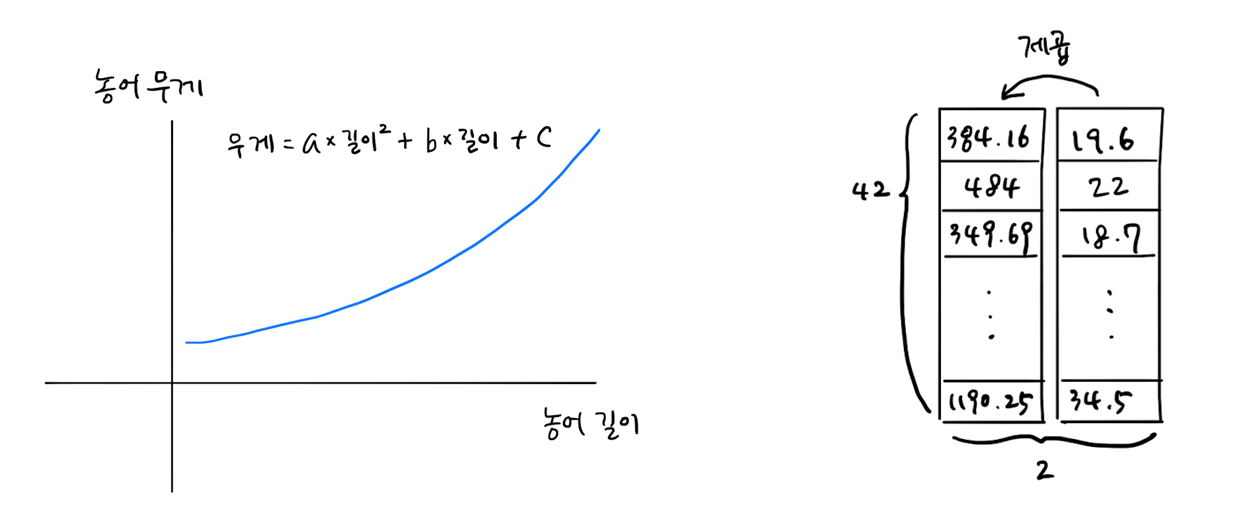

In [43]:
train_poly = np.column_stack((train_input ** 2, train_input)) # np.column_stack()을 사용해 수동으로 다항 특성 생성
test_poly = np.column_stack((test_input ** 2, test_input)) # 절편(bias) 항(상수항)은 자동 추가되지 않음
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [40]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # 1574g

[1573.98423528]


In [41]:
print(lr.coef_, lr.intercept_) # 1, -21.6, 116
# 1573.98 = 1 * 50**2 - 21.6 * 50 + 116

[  1.01433211 -21.55792498] 116.0502107827827


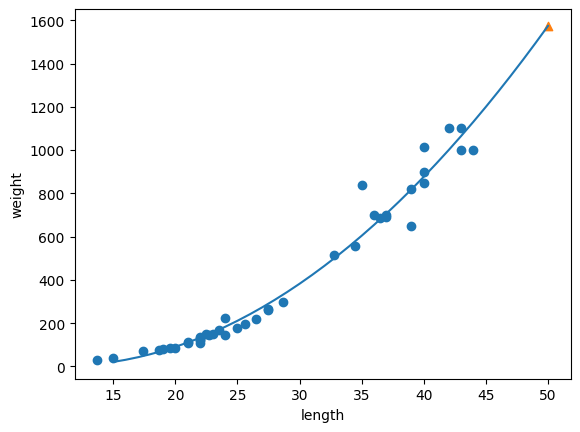

In [47]:
# 구간별 직선을 그리기 위해 15에서 50까지 정수 배열을 만듭니다
point = np.arange(15, 51)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 2차 방정식 그래프를 그립니다
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1] *point + lr.intercept_) # 다항회귀 공식 적용
# 50cm 농어 데이터
plt.scatter([50], lr.predict([[50**2, 50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [51]:
print(lr.score(train_poly, train_target)) # 97%
print(lr.score(test_poly, test_target)) # 97.8%
# 훈련셋 < 테스트셋 : 과소 적합

0.9706807451768623
0.9775935108325122


In [ ]:
# 너무 높은 차수는 과적합(overfitting)을 초래할 수 있기 때문에, 적절한 차수 선택이 중요
# 3차: 데이터에 두 번의 굴곡이 있을 때
# 4차 이상: 데이터가 매우 복잡한 비선형 패턴을 보일 때.

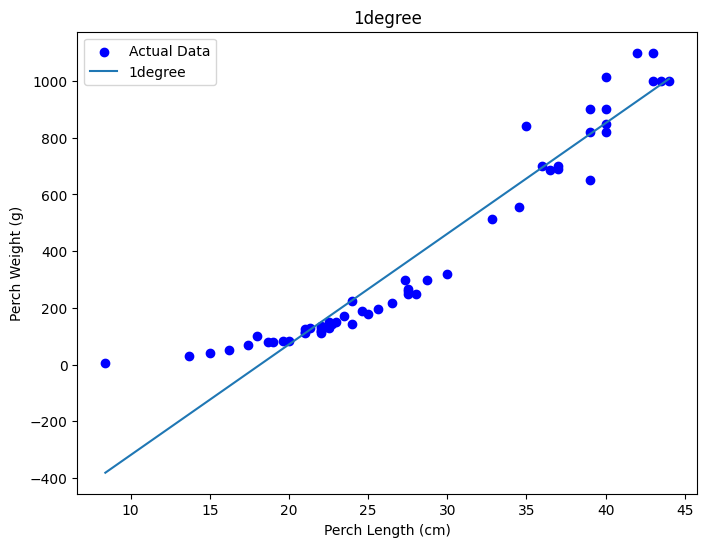

train: 94.0  test: 82.5
Coefficients: [39.01714496]
Intercept: -709.0186449535477
MAE: 94.46, MSE: 17590.27, RMSE: 132.63


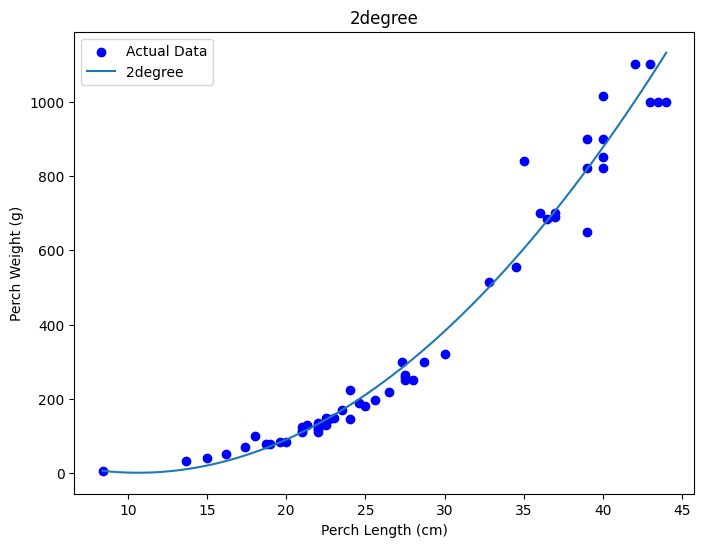

train: 97.1  test: 97.8
Coefficients: [-21.55792498   1.01433211]
Intercept: 116.05021078278395
MAE: 37.77, MSE: 2249.00, RMSE: 47.42


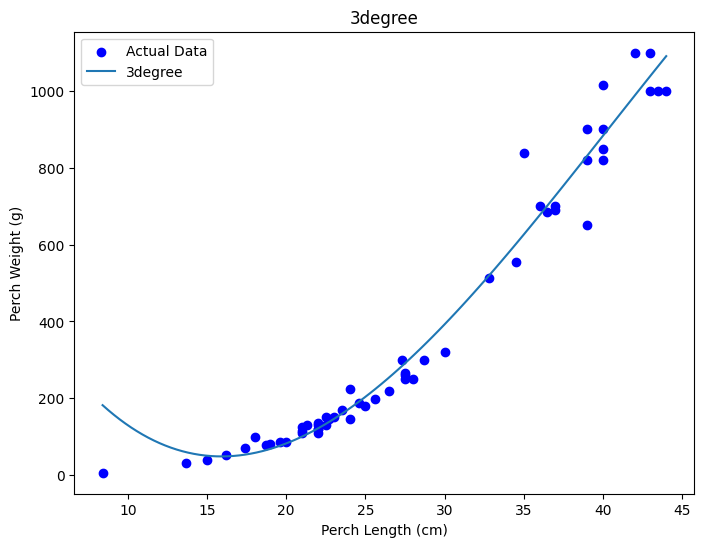

train: 97.3  test: 95.9
Coefficients: [-9.05932876e+01  3.54762430e+00 -2.93594164e-02]
Intercept: 709.9479507457879
MAE: 47.45, MSE: 4131.70, RMSE: 64.28


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 훈련 및 테스트 데이터로 분할
train_length, test_length, train_weight, test_weight = train_test_split(perch_length, perch_weight, random_state=42)

# 1차부터 3차까지 다항 회귀 적용
for degree in [1, 2, 3]:
    # 다항 특성 변환
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    train_length_poly = poly.fit_transform(train_length.reshape(-1, 1))
    test_length_poly = poly.transform(test_length.reshape(-1, 1))

    # 선형 회귀 모델 훈련
    model = LinearRegression()
    model.fit(train_length_poly, train_weight)

    # 예측
    perch_length_range = np.linspace(min(perch_length), max(perch_length), 100).reshape(-1, 1)
    perch_length_range_poly = poly.transform(perch_length_range)
    perch_weight_pred = model.predict(perch_length_range_poly)

    # 그래프 그리기
    plt.figure(figsize=(8, 6))
    plt.scatter(perch_length, perch_weight, color='blue', label='Actual Data')
    plt.plot(perch_length_range, perch_weight_pred, label=f'{degree}degree')
    plt.xlabel('Perch Length (cm)')
    plt.ylabel('Perch Weight (g)')
    plt.title(f'{degree}degree')
    plt.legend()
    plt.show()

    # 훈련 데이터와 테스트 데이터에 대한 R^2 점수 출력
    train_score = round(model.score(train_length_poly, train_weight) * 100, 1)
    test_score = round(model.score(test_length_poly, test_weight) * 100, 1)

    print(f"train: {train_score}  test: {test_score}")

    # 계수 및 절편 출력
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

    # 예측 값으로 오차 계산 (mae, mse, rmse)
    test_pred = model.predict(test_length_poly)
    mae = mean_absolute_error(test_weight, test_pred)
    mse = mean_squared_error(test_weight, test_pred)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")
